In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

In [2]:
# Load dataset
data = pd.read_csv(r"C:\Users\rishi\OneDrive\Desktop\My_Project\SLEEP_DISORDERS_DATASET.csv")

In [3]:
# 1. Initial Data Inspection
print("Data Shape:", data.shape)
print("Data Head:\n", data.head())
print("Data Info:\n", data.info())
print("Null values:\n", data.isnull().sum())

Data Shape: (374, 13)
Data Head:
    Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  


In [4]:
# 2. Data Cleaning
# Drop columns with too many nulls or apply imputation techniques for missing values
data.dropna(inplace=True)  # or use imputation for a more nuanced approach


In [5]:
# 3. Feature Engineering
# Encoding categorical features if any
label_encoder = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = label_encoder.fit_transform(data[column])

In [6]:
# 4. Data Balancing
# Check for target balance
target_col = 'Sleep Disorder'  # replace with actual target column
target_counts = data[target_col].value_counts()
print("Target distribution:\n", target_counts)


Target distribution:
 Sleep Disorder
1    78
0    77
Name: count, dtype: int64


In [7]:
# Apply SMOTE if data is imbalanced
if target_counts.min() / target_counts.max() < 0.5:
    smote = SMOTE()
    X, y = smote.fit_resample(data.drop(columns=[target_col]), data[target_col])
else:
    X = data.drop(columns=[target_col])
    y = data[target_col]

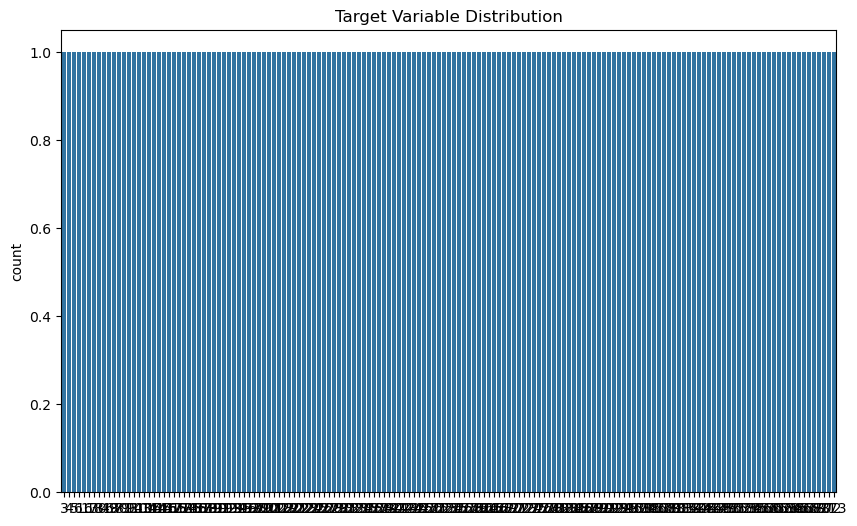

In [8]:
# 5. Data Visualization & EDA
plt.figure(figsize=(10, 6))
sns.countplot(data[target_col])
plt.title("Target Variable Distribution")
plt.show()

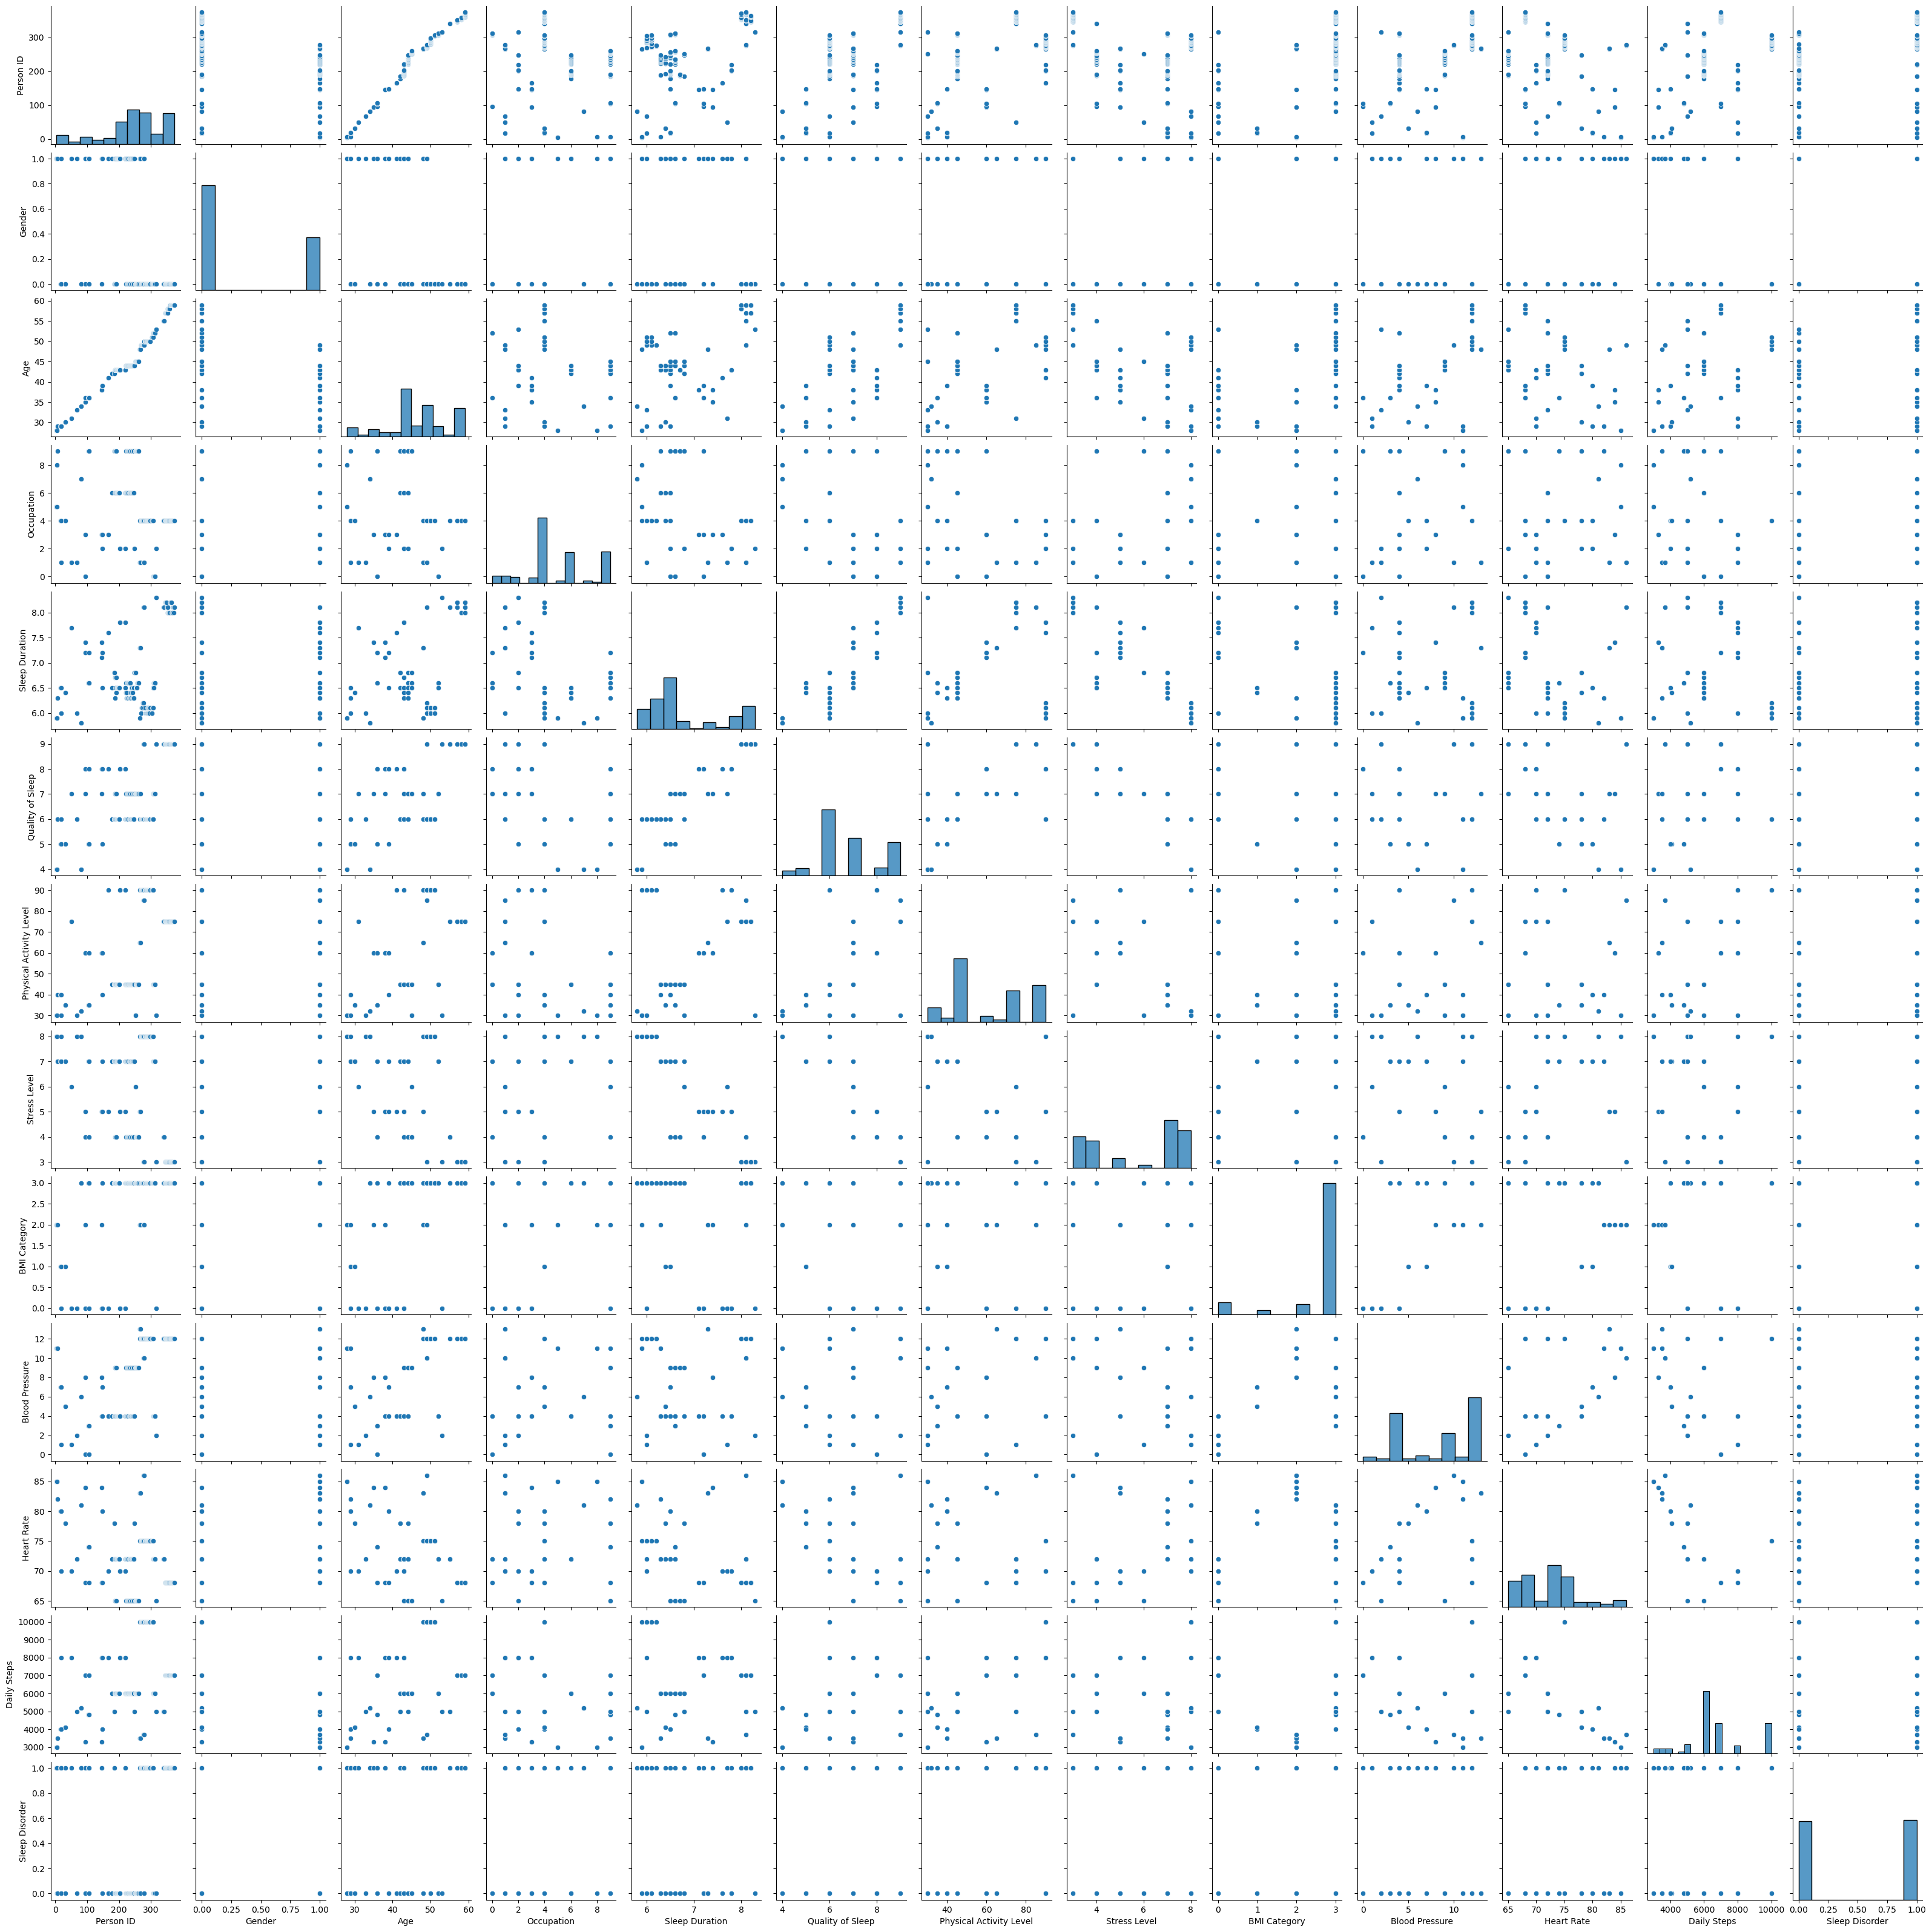

In [9]:
# Pairplot for feature relationships
sns.pairplot(data)
plt.show()

In [10]:
# 6. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# 7. Model Training
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}


In [12]:
# Scaling features if necessary (for distance-based models like KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Train and evaluate each model
model_scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_scores[model_name] = accuracy_score(y_test, y_pred)
    print(f"{model_name}:\n", classification_report(y_test, y_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.82      0.82      0.82        17

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31

Random Forest:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31

K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.86      0.71      0.77        17

    accuracy                           0.77        31
   macro avg       0.78      0.78      0.77        31
weighted avg  

In [14]:
# 8. Identify the Best Model
best_model_name = max(model_scores, key=model_scores.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with accuracy {model_scores[best_model_name]}")


Best Model: Random Forest with accuracy 0.8387096774193549


In [15]:
# 9. Test the Best Model
y_best_pred = best_model.predict(X_test)
print(f"Confusion Matrix for Best Model ({best_model_name}):\n", confusion_matrix(y_test, y_best_pred))
print(f"Classification Report for Best Model ({best_model_name}):\n", classification_report(y_test, y_best_pred))

Confusion Matrix for Best Model (Random Forest):
 [[12  2]
 [ 3 14]]
Classification Report for Best Model (Random Forest):
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [16]:
# Import necessary libraries
"""import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler"""
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
"""file_path = 'SLEEP_DISORDERS_DATASET.csv'  # Adjust the file path as needed
sleep_data = pd.read_csv(file_path)

# Drop irrelevant or unique identifier columns
sleep_data = sleep_data.drop(columns=["Person ID"])

# Convert categorical columns to numeric using label encoding
label_encoders = {}
categorical_columns = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
for col in categorical_columns:
    le = LabelEncoder()
    sleep_data[col] = le.fit_transform(sleep_data[col].astype(str))
    label_encoders[col] = le

# Split the data into features (X) and target (y)
X = sleep_data.drop(columns=["Sleep Disorder"])
y = sleep_data["Sleep Disorder"]

# Normalize the feature set using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)"""

# Define the ANN model architecture
model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


c:\Users\rishi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.3932 - loss: 0.7054 - val_accuracy: 0.7200 - val_loss: 0.6216
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.7090 - loss: 0.6295 - val_accuracy: 0.9200 - val_loss: 0.5633
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.8747 - loss: 0.5750 - val_accuracy: 0.9200 - val_loss: 0.5123
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9336 - loss: 0.5167 - val_accuracy: 0.9600 - val_loss: 0.4589
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9030 - loss: 0.4779 - val_accuracy: 0.9200 - val_loss: 0.4037
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9130 - loss: 0.4300 - val_accuracy: 0.9600 - val_loss: 0.3476
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8806 - loss: 0.4089 - val_accuracy: 0.9600 - val_loss: 0.3001
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8910 - loss: 0.3662 - val_accuracy: 0.9600 - val_loss: 0.259